# 2. Analysis

In [65]:
import pandas as pd
import numpy as np
##visuals
import matplotlib.pyplot as plt
import seaborn as sns

## other
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Importing the data

In [66]:
df1 = pd.read_csv('clean_train.csv')
df2 = pd.read_csv('clean_test.csv')

### Let's understand our train data

In [67]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [69]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0


In [70]:
df1.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

### Lets now see how the test data is

In [71]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [73]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4277.0,28.622866,14.029425,0.0,20.0,27.0,37.0,79.0
RoomService,4277.0,215.062427,601.914503,0.0,0.0,0.0,48.0,11567.0
FoodCourt,4277.0,428.592238,1510.155974,0.0,0.0,0.0,66.0,25273.0
ShoppingMall,4277.0,173.233107,554.991776,0.0,0.0,0.0,27.0,8292.0
Spa,4277.0,295.895955,1104.872018,0.0,0.0,0.0,43.0,19844.0
VRDeck,4277.0,304.898293,1235.991811,0.0,0.0,0.0,31.0,22272.0


In [74]:
df2.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

### So, We have our data clean! (Except for the "Name" feature, which we will deal later!)

### Analysis

Age


Q1 : 20.0
Q2 : 27.0
Q3 : 37.0


lowe limit  : -5.5
upper limit : 62.5


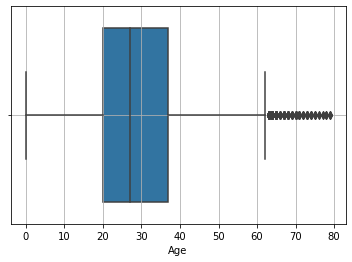



RoomService


Q1 : 0.0
Q2 : 0.0
Q3 : 41.0


lowe limit  : -61.5
upper limit : 102.5


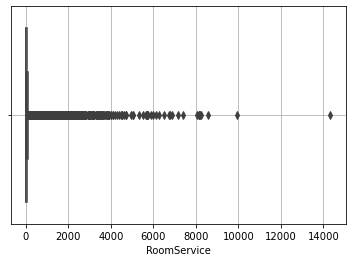



FoodCourt


Q1 : 0.0
Q2 : 0.0
Q3 : 61.0


lowe limit  : -91.5
upper limit : 152.5


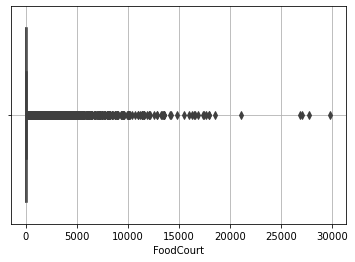



ShoppingMall


Q1 : 0.0
Q2 : 0.0
Q3 : 22.0


lowe limit  : -33.0
upper limit : 55.0


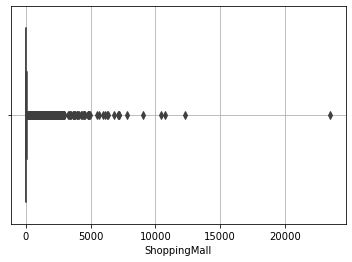



Spa


Q1 : 0.0
Q2 : 0.0
Q3 : 53.0


lowe limit  : -79.5
upper limit : 132.5


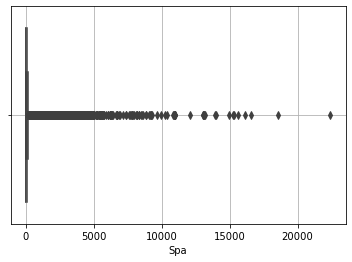



VRDeck


Q1 : 0.0
Q2 : 0.0
Q3 : 40.0


lowe limit  : -60.0
upper limit : 100.0


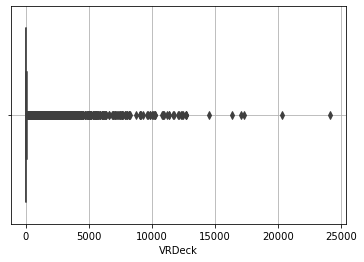

In [191]:
for i in df1.columns:
    if (df1[i].dtypes != 'object') and (df1[i].dtypes != 'bool'):
        print(i)
        print('\n')
        #sns.histplot(df1[i])
        #plt.grid()
        #plt.show()
        q1 = np.percentile(df1[i],25,interpolation='midpoint')
        q2 = np.percentile(df1[i],50,interpolation='midpoint')
        q3 = np.percentile(df1[i],75,interpolation='midpoint')
        iqr = (q3-q1)
        upper_lim = q3+(1.5*iqr)
        lowe_lim = q1-(1.5*iqr)
        print('Q1 :',q1)
        print('Q2 :',q2)
        print('Q3 :',q3)
        print('\n\nlowe limit  :',round(lowe_lim,2))
        print('upper limit :',round(upper_lim,2))
        sns.boxplot(df1[i])
        plt.grid()
        plt.show()
        print('\n')
        print('='*70)

In [75]:
# df1.head()

In [76]:
imp_feats = []

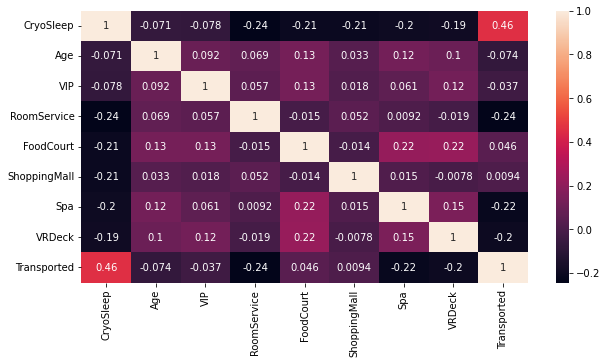

In [130]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Lets see if the HomePlanet played a role on getting transported

In [77]:
planet_trans = pd.DataFrame(df1.HomePlanet.groupby(df1.Transported).value_counts())
planet_trans['percentage'] = round(pd.DataFrame(df1.HomePlanet.groupby(df1.Transported).value_counts(normalize=True))*100,2)

In [78]:
op = pd.DataFrame(df1.Transported.groupby(df1.HomePlanet).value_counts())
op['percentage'] = round(pd.DataFrame(df1.Transported.groupby(df1.HomePlanet).value_counts(normalize=True))*100,2)

In [79]:
op.rename(columns={'Transported':'count'})

count  percentage
HomePlanet Transported                   
Earth      False         2749       57.24
           True          2054       42.76
Europa     True          1404       65.88
           False          727       34.12
Mars       True           920       52.30
           False          839       47.70

In [80]:
# planet_trans

### Inference :
1. we can see that 65% of the passengers from Europa, 57% from earth and 52% from mars have been transported.
2. We can assume that the probability of getting transported is higher if the passenger is from Europa.

In [81]:
imp_feats.append('Home_plannet')

### Lets see if Cryo played a role

In [82]:
cry_trans = pd.DataFrame(df1.Transported.groupby(df1.CryoSleep).value_counts())
cry_trans['percentage'] = round(pd.DataFrame(df1.Transported.groupby(df1.CryoSleep).value_counts(normalize=True))*100,2)

In [83]:
op = pd.DataFrame(df1.CryoSleep.groupby(df1.Transported).value_counts())
op['percentage'] = round(pd.DataFrame(df1.CryoSleep.groupby(df1.Transported).value_counts(normalize=True))*100,2)

In [84]:
op

CryoSleep  percentage
Transported CryoSleep                       
False       False           3761       87.16
            True             554       12.84
True        True            2483       56.72
            False           1895       43.28

In [85]:
cry_trans

Transported  percentage
CryoSleep Transported                         
False     False               3761       66.50
          True                1895       33.50
True      True                2483       81.76
          False                554       18.24

### Inference:
    1. We can see that 81% of people who went into cryo are Transported. 
    2. We can also infer that only 33% of people who did not go into Cryo got transported. 
    3. We can also see that, out of all the people who did not get transported, 87% of them did not go into cryo!  
#### *This basically means, A passenger's probability of getting transported is significantly higher when he goes into cryosleep!*

In [86]:
imp_feats.append('cryo')

### Let's see if the Cabin played a role in the passengers getting transported! 
Based on the position of cabins, we can infer some results! 

### we are splitting the cabin into 2, cabin deck and cabin side

In [87]:
# df1.Cabin.value_counts()

In [88]:
cc = []
for i in df1.Cabin:
    cc.append(i.split('/')[0])
df1['Cabin_Deck'] = cc

In [89]:
col = df1.pop('Cabin_Deck')
df1.insert(4,'Cabin_Deck',col)

In [92]:
cc_trans = pd.DataFrame(df1.Transported.groupby(df1.Cabin_Deck).value_counts(normalize=False))
cc_trans['percentage'] = round(pd.DataFrame(df1.Transported.groupby(df1.Cabin_Deck).value_counts(normalize=True))*100,2)

In [93]:
cc_trans

Transported  percentage
Cabin_Deck Transported                         
A          False                129       50.39
           True                 127       49.61
B          True                 572       73.43
           False                207       26.57
C          True                 508       68.01
           False                239       31.99
D          False                271       56.69
           True                 207       43.31
E          False                563       64.27
           True                 313       35.73
F          False               1565       56.01
           True                1229       43.99
G          True                1421       51.52
           False               1337       48.48
T          False                  4       80.00
           True                   1       20.00

### Inferences : 
1. 73% of passengers who were in CabinCatg B have been Transported.
2. 68% of passengers in Cabin Catg. C have been transported
3. 64% of passengers in CabinCatg E have not been transported.
4. importantly, 80% of people in Cabin Catg. T have not been Transported. 


*To sum things up, passengers from B and C have a higher probability of being transported while passenger from E and T have a very low probability of getting transported.*

In [94]:
imp_feats.append('Cabin_Deck')

### Lets see if the side of the cabin makes a difference

In [95]:
side = []
for i in df1.Cabin:
    side.append(i.split('/')[2])
df1['Cabin_Side'] = side    

In [96]:
col = df1.pop('Cabin_Side')
df1.insert(5,'Cabin_Side',col)

In [97]:
cs_trans = pd.DataFrame(df1.Transported.groupby(df1.Cabin_Side).value_counts())
cs_trans['percentage'] = round(pd.DataFrame(df1.Transported.groupby(df1.Cabin_Side).value_counts(normalize=True))*100,2)

In [98]:
cs_trans

Transported  percentage
Cabin_Side Transported                         
P          False               2407       54.64
           True                1998       45.36
S          True                2380       55.50
           False               1908       44.50

### Let's now create a feature combining the Cabin deck and side

In [99]:
df1['Cabin_DS'] = df1['Cabin_Deck'] + df1['Cabin_Side']

In [100]:
col = df1.pop('Cabin_DS')
df1.insert(6,'Cabin_DS',col)

In [103]:
cds_trans = pd.DataFrame(df1.Transported.groupby(df1.Cabin_DS).value_counts())
cds_trans['percentage'] = round(pd.DataFrame(df1.Transported.groupby(df1.Cabin_DS).value_counts(normalize=True))*100,2)

In [104]:
cds_trans

Transported  percentage
Cabin_DS Transported                         
AP       False                 66       56.41
         True                  51       43.59
AS       True                  76       54.68
         False                 63       45.32
BP       True                 238       67.42
         False                115       32.58
BS       True                 334       78.40
         False                 92       21.60
CP       True                 198       58.06
         False                143       41.94
CS       True                 310       76.35
         False                 96       23.65
DP       False                148       59.68
         True                 100       40.32
DS       False                123       53.48
         True                 107       46.52
EP       False                282       65.73
         True                 147       34.27
ES       False                281       62.86
         True                 166       37.14
FP       False                847       58.90
         True                 591       41.10
FS       False                718       52.95
         True                 638       47.05
GP       False                803       54.44
         True                 672       45.56
GS       True                 749       58.38
         False                534       41.62
TP       False                  3       75.00
         True                   1       25.00
TS       False                  1      100.00

### Inferences :
1. Our inferences from the Deck and Transportation and the Side with Transportation are making sense now. 
2. Passengers from deck B, Side S and deck C, side S have a higher probabilty of being transported.
3. Passengers from Deck E from both sides have been transported. 
4. 100% of the passenger(s) (1/1) from deck T, Side S has not been transported. 
5. 75% of the passengers from deck T and side P have not been transported. 

### Did the Passenger group play a role ?

In [111]:
pg = []
for i in df1.PassengerId:
    pg.append(i.split('_')[0])
df1['Passenger_group'] = pg

In [112]:
col = df1.pop('Passenger_group')
df1.insert(1,'Passenger_group',col)

### Did passenger Number play a role ?

In [108]:
pn = []
for i in df1.PassengerId:
    pn.append(i.split('_')[1])
df1['Passenger_No'] = pn

In [109]:
col = df1.pop('Passenger_No')
df1.insert(1,'Passenger_No',col)

In [117]:
pn_trans = pd.DataFrame(df1.Transported.groupby(df1.Passenger_No).value_counts())
pn_trans['percentage'] = round(pd.DataFrame(df1.Transported.groupby(df1.Passenger_No).value_counts(normalize=True))*100,2)

In [118]:
pn_trans

Transported  percentage
Passenger_No Transported                         
01           False               3258       52.40
             True                2959       47.60
02           True                 789       55.88
             False                623       44.12
03           True                 353       61.82
             False                218       38.18
04           True                 137       59.31
             False                 94       40.69
05           True                  70       54.69
             False                 58       45.31
06           True                  41       54.67
             False                 34       45.33
07           False                 23       50.00
             True                  23       50.00
08           False                  7       53.85
             True                   6       46.15

### Passenger No is not a significant factor

### Lets see if Destination is of a passenger make any significant difference

In [265]:
# df1.Destination.value_counts()

In [120]:
dest_trans = pd.DataFrame(df1.Transported.groupby(df1.Destination).value_counts())
dest_trans['percentage'] = round(pd.DataFrame(df1.Transported.groupby(df1.Destination).value_counts(normalize=True))*100,2)

In [121]:
dest_trans

Transported  percentage
Destination   Transported                         
55 Cancri e   True                1098       61.00
              False                702       39.00
PSO J318.5-22 True                 401       50.38
              False                395       49.62
TRAPPIST-1e   False               3218       52.78
              True                2879       47.22

### Inference : 61% of Passengers who were travelling to "55 Cancrl e" were transported.

### Does a VIP passenger have a significant chance of getting transported/ not transported ?

In [125]:
vip_trans = pd.DataFrame(df1.Transported.groupby(df1.VIP).value_counts())
vip_trans['percentage'] = round(pd.DataFrame(df1.Transported.groupby(df1.VIP).value_counts(normalize=True))*100,2)

In [126]:
vip_trans

Transported  percentage
VIP   Transported                         
False True                4302       50.65
      False               4192       49.35
True  False                123       61.81
      True                  76       38.19

### Inference :
1. 61% of the VIP passengers have been transported while only 50% of the Non VIP passengers have been transported.

In [137]:
cryo_cab = pd.DataFrame(df1.CryoSleep.groupby(df1.Cabin).value_counts(normalize=False))
cryo_cab['percentage'] = round(pd.DataFrame(df1.CryoSleep.groupby(df1.Cabin).value_counts(normalize=False))

In [148]:
# cryo_cab.head(60)

### average cost of Room service WRT transportation

             RoomService  percentage
Transported                         
False         380.425261       86.01
True           61.901782       13.99


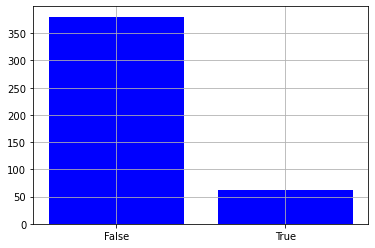

In [274]:
rs_mean_trans = pd.DataFrame(df1.RoomService.groupby(df1.Transported).mean())
rs_mean_trans['percentage'] = round(rs_mean_trans['RoomService'] / sum(rs_mean_trans['RoomService'])*100,2)
plt.bar(rs_mean_trans.index , rs_mean_trans.RoomService,color='b')
plt.grid()
plt.xticks(ticks=[0,1],labels=['False','True'])
print(rs_mean_trans)
plt.show()

### Inference :  we can clearly see here that the people who got transported spent significantly lower (on average) than the people who did not get transported

### Does the age make the difference

In [178]:
df1.Age.groupby(df1.Transported).mean()

Transported
False    29.862572
True     27.733440
Name: Age, dtype: float64

### No big difference in terms of age

### Lets create a new feature, Age Category

In [200]:
act = []
for i in df1.Age:
    if i <= 20:
        act.append('0-20')
    elif 21<= i <= 40:
        act.append('21-40')
    elif 41<= i <= 60:
        act.append('41-60')
    elif i > 60:
        act.append('60+')

In [203]:
df1['Age_Catg'] = act

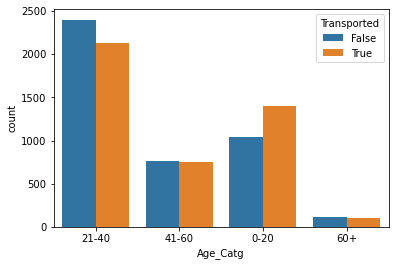

Age_Catg  Transported
0-20      True           0.573717
          False          0.426283
21-40     False          0.529711
          True           0.470289
41-60     False          0.504964
          True           0.495036
60+       False          0.527273
          True           0.472727
Name: Transported, dtype: float64


In [208]:
sns.countplot(df1.Age_Catg,hue=df1.Transported)
plt.show()
print(df1.Transported.groupby(df1.Age_Catg).value_counts(normalize=True))

In [220]:
fc_trans = pd.DataFrame(df1.FoodCourt.groupby(df1.Transported).mean())
fc_trans['percentage'] = round(fc_trans['FoodCourt']/sum(fc_trans['FoodCourt'])*100,2)

In [221]:
fc_trans

,FoodCourt,percentage
Transported,,
False,375.167555,41.88
True,520.646185,58.12


### We can see, people who got transported have spent more on Food Courts than those who did not get transported

### Shopping Mall vs Transportation

In [225]:
sm_trans = pd.DataFrame(df1.ShoppingMall.groupby(df1.Transported).mean())
sm_trans['percentage'] = round(sm_trans['ShoppingMall']/sum(sm_trans['ShoppingMall'])*100,2)

In [226]:
sm_trans

,ShoppingMall,percentage
Transported,,
False,163.915875,48.34
True,175.147328,51.66


### No significant difference

### Spa and its effects on getting transported

In [227]:
spa_trans = pd.DataFrame(df1.Spa.groupby(df1.Transported).mean())
spa_trans['percentage'] = round(spa_trans['Spa']/sum(spa_trans['Spa'])*100,2)

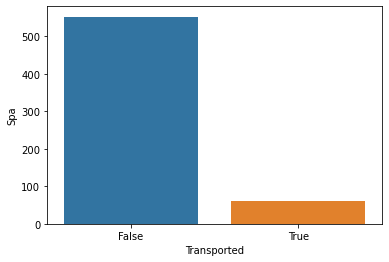

,Spa,percentage
Transported,,
False,552.349479,90.14
True,60.393559,9.86


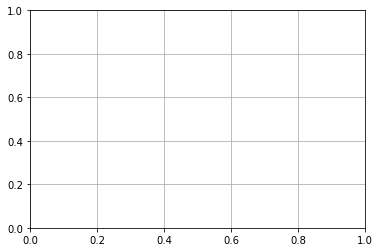

In [266]:
sns.barplot(spa_trans.index, spa_trans.Spa)
plt.show()
plt.grid()
spa_trans

### We can see a significant difference here, People who spent more (on average) for Spa did not get transported.

### VR Deck and the effects of passengers getting transported

In [236]:
vrd_trans = pd.DataFrame(df1.VRDeck.groupby(df1.Transported).mean())
vrd_trans['percentage'] = round(vrd_trans['VRDeck']/sum(vrd_trans['VRDeck'])*100,2)

In [237]:
vrd_trans

,VRDeck,percentage
Transported,,
False,532.291078,88.73
True,67.600274,11.27


### Another inference here is that, people who spent more money on the VRDeck did not get transported.

### Let's now create a feature, "Total expenditure" suming up all the cost factors

In [270]:
df1['Total_Expenses'] = df1['RoomService'] + df1['Spa'] + df1['VRDeck'] 
## Excluding Shopping Mall and Food court as it did not give us a significant difference

In [271]:
te_trans = pd.DataFrame(df1.Total_Expenses.groupby(df1.Transported).mean())
te_trans['percentage'] = round(te_trans['Total_Expenses'] / sum(te_trans['Total_Expenses'])*100,2)

In [272]:
te_trans

,Total_Expenses,percentage
Transported,,
False,1465.065817,88.53
True,189.895614,11.47


## We can now see a significant difference here! The People who have spent less (on average) in the RoomService, Spa and on the VRDeck have been transported! and people who have on an average spent significantly higher than these 3 areas have not been transported. 

### Lets now arrange our data

In [261]:
col = df1.pop('Age_Catg')
df1.insert(11,'Age_Catg',col)

In [263]:
col = df1.pop('Total_Expenses')
df1.insert(18,'Total_Expenses',col)

In [273]:
df1.head()

,PassengerId,Passenger_group,Passenger_No,HomePlanet,CryoSleep,Cabin,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,Age_Catg,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Name,Transported
0,0001_01,0001,01,Europa,False,B/0/P,B,P,BP,TRAPPIST-1e,39.0,21-40,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0002,01,Earth,False,F/0/S,F,S,FS,TRAPPIST-1e,24.0,21-40,False,109.0,9.0,25.0,549.0,44.0,702.0,Juanna Vines,True
2,0003_01,0003,01,Europa,False,A/0/S,A,S,AS,TRAPPIST-1e,58.0,41-60,True,43.0,3576.0,0.0,6715.0,49.0,6807.0,Altark Susent,False
3,0003_02,0003,02,Europa,False,A/0/S,A,S,AS,TRAPPIST-1e,33.0,21-40,False,0.0,1283.0,371.0,3329.0,193.0,3522.0,Solam Susent,False
4,0004_01,0004,01,Earth,False,F/1/S,F,S,FS,TRAPPIST-1e,16.0,0-20,False,303.0,70.0,151.0,565.0,2.0,870.0,Willy Santantines,True


### Lets now save this data as a csv, and pass it to an ML model! 

In [276]:
# df1.to_csv('to_machinelearning.csv',index=False)